In [1]:
import pandas as pd
import numpy as np

In [2]:
data_df         = pd.read_csv("denv.csv", header=None).T
data_df.columns = data_df.iloc[0]
data_df         = data_df.iloc[1:]
#data_df = data_df.drop(columns=["Sample_organism_ch1", "Sample_type",
#                        "Sample_last_update_date", "Sample_contact_address",
#                        "Sample_contact_city", "Sample_contact_state",
#                        "Sample_contact_country", "Sample_supplementary_file", "series_matrix_table_end",
#                        'Sample_data_processing', 'Sample_platform_id', 'Sample_contact_name',
#                        'Sample_contact_email', 'Sample_contact_department'])
data_df["diagnosis"] = data_df["diagnosis"].apply(lambda x: x.split(": ")[1])
data_df["patient_ID"] = data_df["Sample_title"].apply(lambda x: "-".join(x.split("-")[:-1]))

data_disease_df = data_df[["patient_ID", "diagnosis"]]
#data_disease_df = data_disease_df[data_disease_df.diagnosis != "exclude"]
data_disease_df["patient_diag"] = data_disease_df["patient_ID"] + "_" + data_disease_df["diagnosis"]
patient2diag_dict = dict(zip(data_disease_df["patient_ID"], data_disease_df["diagnosis"]))


/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_35003/1461293488.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_disease_df["patient_diag"] = data_disease_df["patient_ID"] + "_" + data_disease_df["diagnosis"]


In [3]:
def modify_patient_id_gene_expression(patient_id):
    l = patient_id.split("-")
    if len(l) == 3:
        return "-".join(l[:-1])
    else:
        return "-".join(l)

gene_expression_df = pd.read_excel("denv_pcr.xlsx")
gene_expression_df = gene_expression_df[gene_expression_df["patient_ID"]!="3-004-01"]
gene_expression_df["patient_ID"] = gene_expression_df["patient_ID"].apply(modify_patient_id_gene_expression)
gene_expression_df["diagnosis"]  = gene_expression_df["patient_ID"].apply(lambda x: patient2diag_dict[x])
gene_expression_df               = gene_expression_df[gene_expression_df["diagnosis"] != "exclude"]
gene_expression_df

,patient_ID,plate_ID,mRNA,Value,Quality,Call,Threshold,diagnosis
0,1-010,S16-A04,PTPRM,20.817483,0.925333,Pass,0.004331,DSS
1,1-010,S16-A01,AAK1,17.748183,0.795321,Pass,0.001502,DSS
2,1-010,S16-A02,BMP2K,17.294386,0.798279,Pass,0.003788,DSS
3,1-010,S16-A03,ENPP5,29.129949,0.662016,Pass,0.001880,DSS
4,1-010,S16-A08,C3orf18,22.489814,0.767580,Pass,0.003659,DSS
...,...,...,...,...,...,...,...,...
10219,1-024,S33-A34,TMEM63C,26.533032,0.567610,Pass,0.001819,DF
10220,1-024,S33-A35,EMPTY,40.000000,0.000000,No Call,0.001819,DF
10221,1-024,S33-A02,BMP2K,40.000000,0.000000,Pass,0.001819,DF
10222,1-024,S33-A04,PTPRM,22.472190,0.900244,Pass,0.001819,DF


Text(0.02, 0.5, 'count')

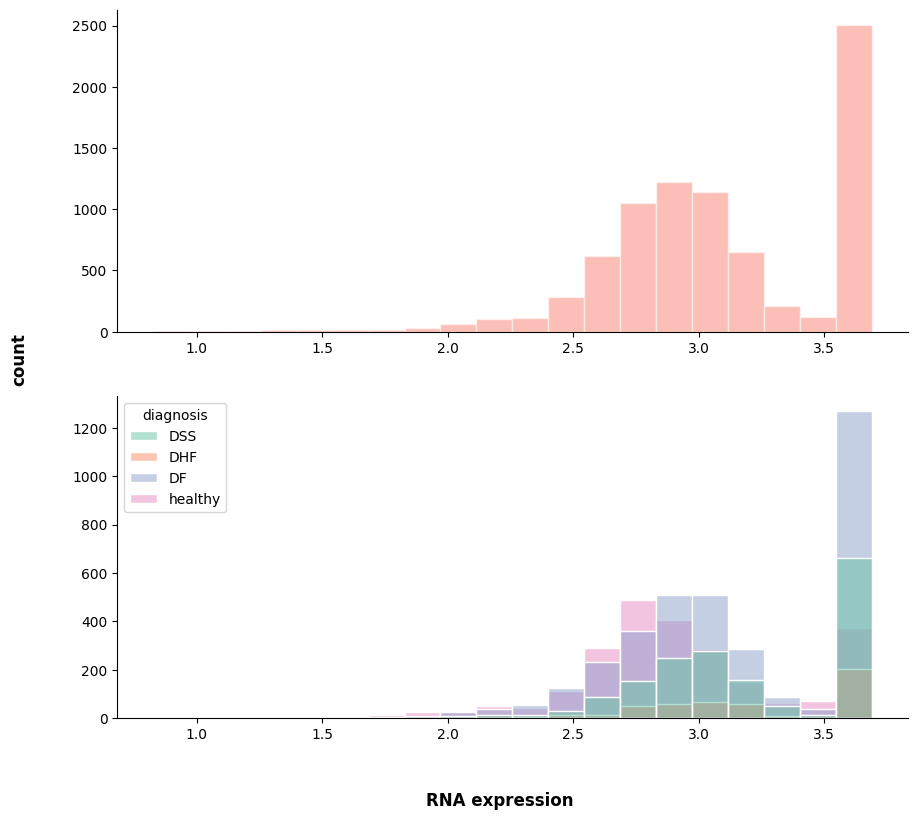

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(2, 1, figsize=(10.2, 9.2))

ax[0].hist(np.log(gene_expression_df["Value"].values), edgecolor="w", facecolor="salmon",
                                                                alpha=0.5, bins=20)

gene_expression_df["log_Value"] = np.log(gene_expression_df["Value"].values)
sns.histplot(ax       = ax[1],
            data      = gene_expression_df,
            x         = "log_Value",
            hue       = "diagnosis",
            edgecolor = "w",
            bins    = 20,
            palette = "Set2")
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

for axi in ax.flatten():
    axi.spines["top"].set_visible(False)
    axi.spines["right"].set_visible(False)

fig.supxlabel("RNA expression", weight="bold")
fig.supylabel("count", weight="bold")


/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_35003/866531282.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_expression2_df["log_Value"] = np.log(gene_expression2_df["Value"].values)


Text(0.02, 0.5, 'count')

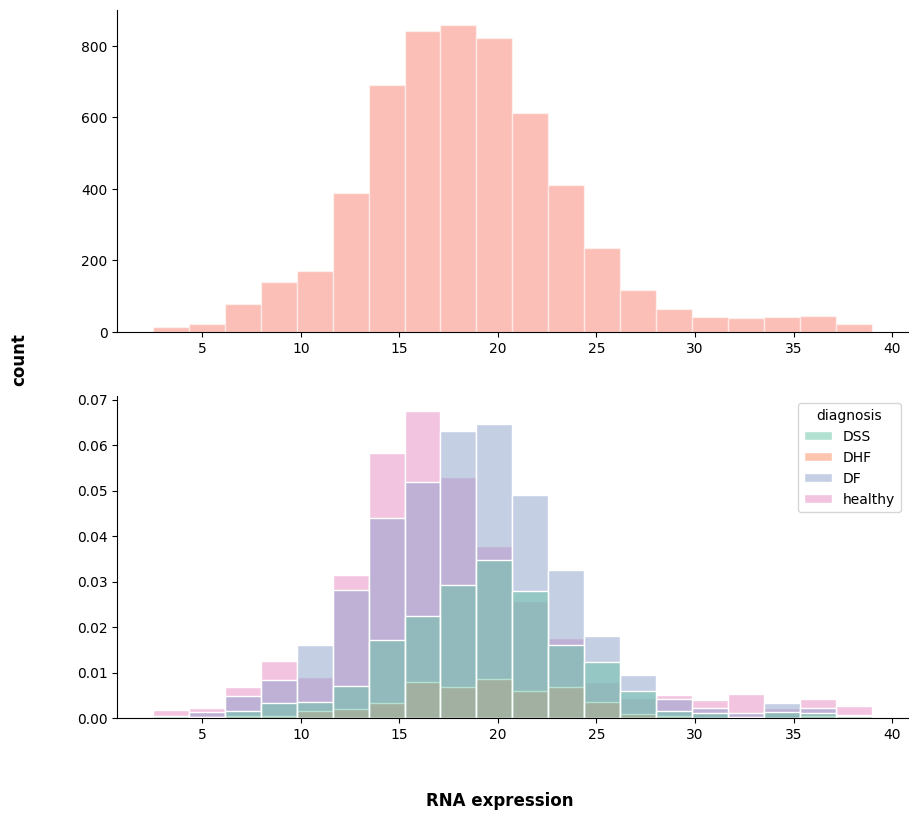

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


gene_expression2_df = gene_expression_df[gene_expression_df.Quality>0]

fig, ax = plt.subplots(2, 1, figsize=(10.2, 9.2))

ax[0].hist(gene_expression2_df["Value"].values, edgecolor="w", facecolor="salmon",
                                                                alpha=0.5, bins=20)

gene_expression2_df["log_Value"] = np.log(gene_expression2_df["Value"].values)
sns.histplot(ax       = ax[1],
            data      = gene_expression2_df,
            x         = "Value",
            hue       = "diagnosis",
            edgecolor = "w",
            bins      = 20,
            stat      = "probability",
            palette   = "Set2")

ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

for axi in ax.flatten():
    axi.spines["top"].set_visible(False)
    axi.spines["right"].set_visible(False)

fig.supxlabel("RNA expression", weight="bold")
fig.supylabel("count", weight="bold")


In [6]:
def dig2num(diagnosis):
    if diagnosis == "DF":
        return 1
    elif diagnosis == "DHF":
        return 2
    elif diagnosis == "DSS":
        return 3
    else:
        return 0

logistic_reg_df = gene_expression2_df[["patient_ID", "mRNA", "Value", "diagnosis"]]
logistic_reg_df["value_diag"] = logistic_reg_df["diagnosis"].apply(dig2num)

labels_df          = logistic_reg_df[["patient_ID", "value_diag"]].drop_duplicates().reset_index(drop=True)
expression_mat_df  = pd.pivot_table(logistic_reg_df, index="patient_ID", columns="mRNA", values="Value")

/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_35003/2341201482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logistic_reg_df["value_diag"] = logistic_reg_df["diagnosis"].apply(dig2num)


# PCA

In [8]:
labels_df["disease_label"] = labels_df["value_diag"].apply(lambda x: 1 if x>0 else 0)

In [9]:
# X = feature values, all the columns except the last column
x_mat = expression_mat_df.iloc[:, :]
μ_x   = np.nanmean(x_mat, axis=0)
σ_x   = np.nanstd(x_mat, axis=0)

xn_mat = (x_mat - μ_x) / σ_x
xn_mat = np.c_[np.ones((xn_mat.shape[0], 1)), xn_mat] ## augment with column of ones

y_vec = labels_df.iloc[:, -1].to_numpy()


Text(0, 0.5, 'principal component 2, 1.69%')

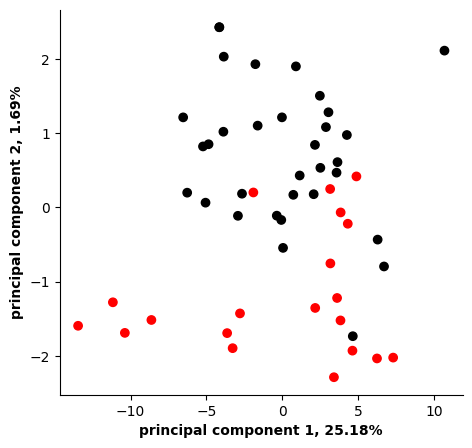

In [10]:
from sklearn.decomposition import PCA
pca_mRNA_denv = PCA(n_components=2, svd_solver='arpack')
pc_mRNA       = pca_mRNA_denv.fit_transform(np.nan_to_num(xn_mat[:, 1:]))


label2color = {0:"red", 1:"black"}
y_color     = [label2color[y] for y in y_vec]

pca_df = pd.DataFrame(data = pc_mRNA, columns = ['pc1', 'pc2'])

fig, ax = plt.subplots(1, 1, figsize=(5.2, 5))
ax.scatter(pca_df.pc1, pca_df.pc2, color=y_color)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

exp_var = pca_mRNA_denv.explained_variance_

ax.set_xlabel("principal component 1, {:0.2f}%".format(exp_var[0]), weight="bold")
ax.set_ylabel("principal component 2, {:0.2f}%".format(exp_var[1]), weight="bold")


In [11]:
pca_mRNA_denv = PCA(n_components=20, svd_solver='arpack')
pc_mRNA       = pca_mRNA_denv.fit_transform(np.nan_to_num(xn_mat[:,1:]))

dfLoadings = pd.DataFrame(pca_mRNA_denv.components_,
                          columns = expression_mat_df.columns,
                          index   = [f"pc{i}" for i in range(1, 20+1)])


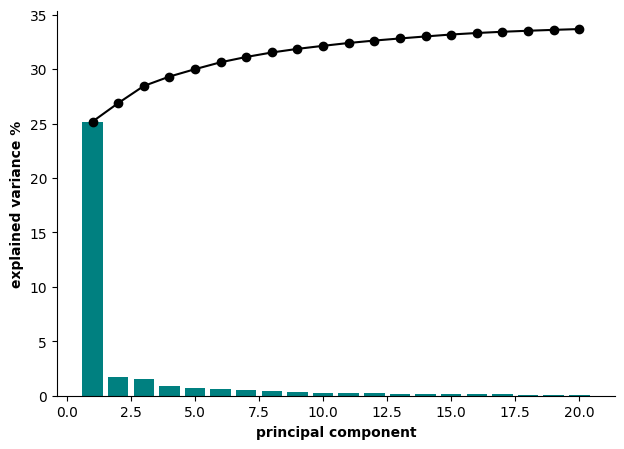

In [12]:
pca_mRNA_denv.explained_variance_

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5))

ax.bar(range(1,     len(pca_mRNA_denv.explained_variance_ratio_)+1), pca_mRNA_denv.explained_variance_, color="teal")
ax.plot(range(1,    len(pca_mRNA_denv.explained_variance_ratio_)+1), np.cumsum(pca_mRNA_denv.explained_variance_), color="k", ls="-")
ax.scatter(range(1, len(pca_mRNA_denv.explained_variance_ratio_)+1), np.cumsum(pca_mRNA_denv.explained_variance_), color="k")

ax.set_ylabel("explained variance %", weight="bold")
ax.set_xlabel("principal component", weight="bold")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


# Logistic regression

In [13]:
from scipy.optimize import fmin_tnc

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def prob(theta, x):
    return sigmoid(np.dot(x, theta))

def objective(theta, x, y):
    # Computes the (negative of the) objective function, for all the training samples

    p = prob(theta, x)
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta values
    return np.dot(x.T, sigmoid(np.dot(x, theta)) - y)

def fit(x, y, theta):
    return fmin_tnc(func=objective, x0=theta, fprime=gradient, args=(x, y))[0]
